<a href="https://colab.research.google.com/github/davidklhui/UoN/blob/main/MATH4021_extra_materials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install csaps

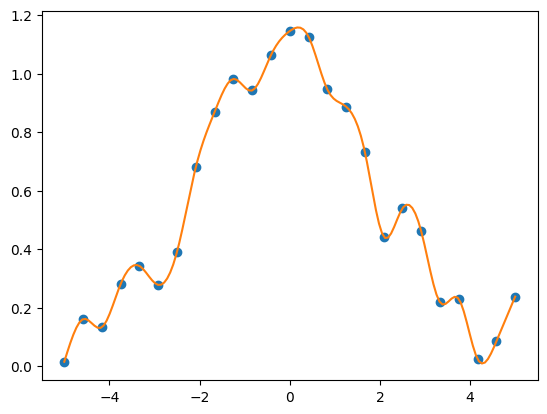

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csaps

np.random.seed(1234)

x = np.linspace(-5., 5., 25)
y = np.exp(-(x/2.5)**2) + (np.random.rand(25) - 0.2) * 0.3
smooth = 1
sp = csaps.CubicSmoothingSpline(x, y, smooth=smooth)

xs = np.linspace(x[0], x[-1], 150)
ys = sp(xs)

plt.plot(x, y, 'o', xs, ys, '-')
# plt.title(f"Using smooth parameter = {smooth}")
plt.show()

In [ ]:
!pip install geomstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 80.2 MB/s eta 0:00:00


In [ ]:
v1,v2

(array([[ 7.85398163e-01,  1.36034952e+00, -9.61835347e-17]]),
 array([[-7.85398163e-01,  1.36034952e+00, -9.61835347e-17]]))

In [ ]:
def geodesic_distance(point_from, point_to):
  """
  Calculate the distance between 2 points on S^2

  :point_from: accept 3d np array [x,y,z]
  :point_to: accept 3d np array [x,y,z]
  """
  if round(np.linalg.norm(point_from), 8) != 1:
    print(f'point_to={point_from}, with norm={np.linalg.norm(point_from)}')
    raise Exception("the given point_from is not norm 1")
  if round(np.linalg.norm(point_to), 8) != 1:
    print(f'point_to={point_to}, with norm={np.linalg.norm(point_to)}')
    raise Exception("the given point_to is not norm 1")

  dotproduct = np.dot(point_from, point_to)
  if np.abs(dotproduct) >= 1:
    return 0
  else:
    return np.arccos(dotproduct)

def velocity(point_from, point_to):
  """
  Calculate the initial velocity to move from point_from to point_to along the piecewise geodesic
  Here it just "reserved" the direction, so the norm is 1

  :point_from: accept 3d array [x,y,z]
  :point_to: accept 3d array [x,y,z]
  """

  p0 = point_from
  p1 = point_to

  # unit direction
  t = geodesic_distance(p0, p1)
  direction = (p1 - p0 * np.cos(t)) / np.sin(t)


  return (direction)


def exponential_map(contact_point, vector_on_tangent_plane):

  """
  The mapping of tangent from the tangent plane to the sphere
  To prevent rounding error, will divide the L2-norm again
  """

  p = contact_point
  v = vector_on_tangent_plane

  if round(np.linalg.norm(v), 8) == 0:
    return p

  else:
    nv = np.linalg.norm(v)
    result = p * np.cos(nv) + (v/nv) * np.sin(nv)

    return result / np.linalg.norm(result)

def inverse_exponential_map(contact_point, point_on_sphere):
  """
  return the tangent vector on the tangent plane [x,y,z]
  """
  p = contact_point
  p2 = point_on_sphere

  if round(np.linalg.norm(contact_point-point_on_sphere), 8)==0:
    return np.array([0,0,0])
  else:
    v = velocity(p, p2) * geodesic_distance(p, p2)

    return v


(3,)


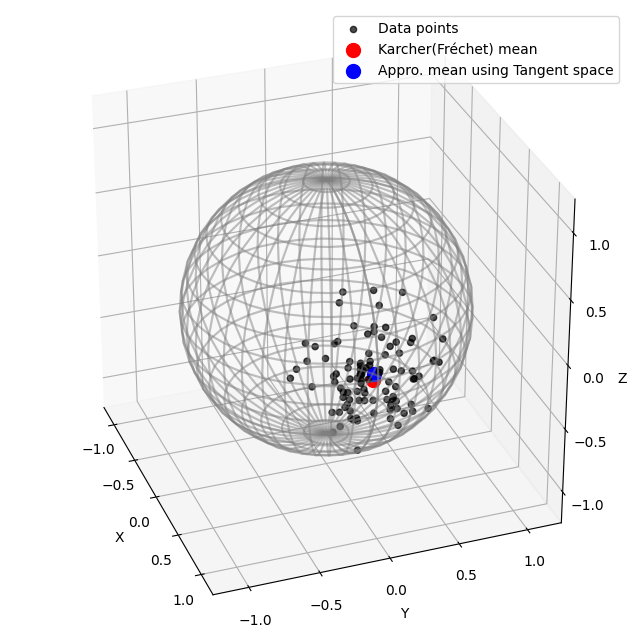

In [ ]:
import numpy as np
import geomstats.backend as gs
import geomstats.visualization as visualization
import matplotlib.pyplot as plt
from geomstats.learning.frechet_mean import FrechetMean
from geomstats.geometry.hypersphere import Hypersphere
from numpy import sqrt

# Create the hypersphere object
sphere = Hypersphere(dim=2)

# Given points
p1 = (1/2, sqrt(3/4), 0)
p2 = (-1/2, sqrt(3/4), 0)
p3 = (0,1,0)
points = np.array([p1, p2, p3])

# Initial estimate for the Karcher mean
#initial_mean = np.array([0, 0, 1])

# Karcher mean optimization
data = sphere.random_von_mises_fisher(kappa=15, n_samples=100)

#print(data)
mean = FrechetMean(metric=sphere.metric)
mean.fit(data)


mean.estimate_
v = sphere.metric.log(data, np.array([0,0,1]))
vv = np.mean(v, axis=0)
print(vv.shape)
xx = sphere.metric.exp(vv, np.array([0,0,1]))

xx, mean.estimate_

fig = plt.figure(figsize=(8, 8))
ax = visualization.plot(data, space="S2", color="black", alpha=0.7, label="Data points")
ax = visualization.plot(
    mean.estimate_, space="S2", color="red", ax=ax, s=100, label="Karcher(Fréchet) mean"
)
ax = visualization.plot(
    xx, space="S2", color="blue", ax=ax, s=100, label="Appro. mean using Tangent space"
)

ax.set_box_aspect([1, 1, 1])
ax.view_init(30, -20)
ax.legend();


In [ ]:
vvvv = np.array(list(map(lambda d: inverse_exponential_map(np.array([0,0,1]), d), np.array(data))))

vvv = np.mean(vvvv, axis=0)
vvv

xxx = exponential_map(np.array([0,0,1]), vvv)
xxx

array([0.9943996 , 0.00898977, 0.10530253])

# Example:Gaussian Process Regression
# following https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py

# Demo using the relationship y = x sin(x) + N(0,0.5)


In [ ]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

In [ ]:
x = np.linspace(0, 2*np.pi, num=100).reshape(-1,1)
y = np.squeeze(x*np.sin(x))
y2 = y + np.random.normal(0,.5, size=len(x))

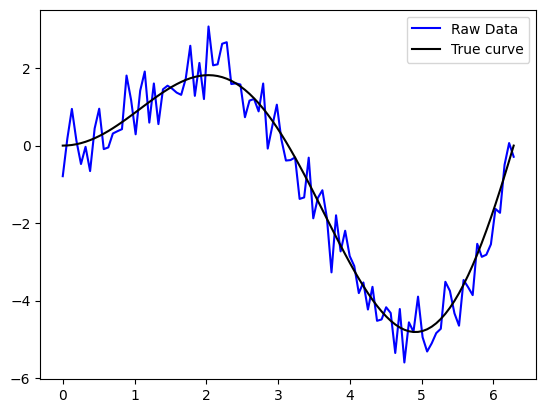

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x,y2, label="Raw Data", color="blue")
plt.plot(x,y, label="True curve", color="black")

plt.legend()
plt.show()

In [ ]:
kernel = 1.0 * RBF() + WhiteKernel(noise_level_bounds=[1e-12,1e5])
gpr = GaussianProcessRegressor(kernel=kernel)

gpr.fit(x,y)
mean_prediction, std_prediction = gpr.predict(x, return_std=True)

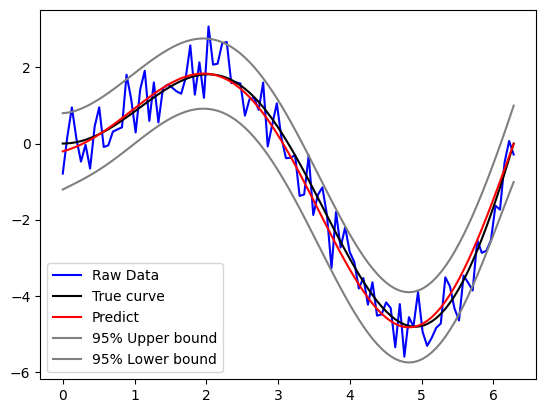

In [ ]:
plt.plot(x,y2, label="Raw Data", color="blue")
plt.plot(x,y, label="True curve", color="black")

plt.plot(x, mean_prediction, label="Predict", color="red")
plt.plot(x, mean_prediction + 1.96 * std_prediction, label="95% Upper bound", color="gray")
plt.plot(x, mean_prediction - 1.96 * std_prediction, label="95% Lower bound", color="gray")
plt.legend()
plt.show()

In [ ]:
gpr.kernel_

3.84**2 * RBF(length_scale=1.7) + WhiteKernel(noise_level=0.211)

GPR with forecasting

In [ ]:
x_new = np.linspace(0, 3*np.pi, num=100).reshape(-1,1)
forecast_mean, forecast_std = gpr.predict(x_new, return_std=True)

y3 = x*np.sin(x_new)


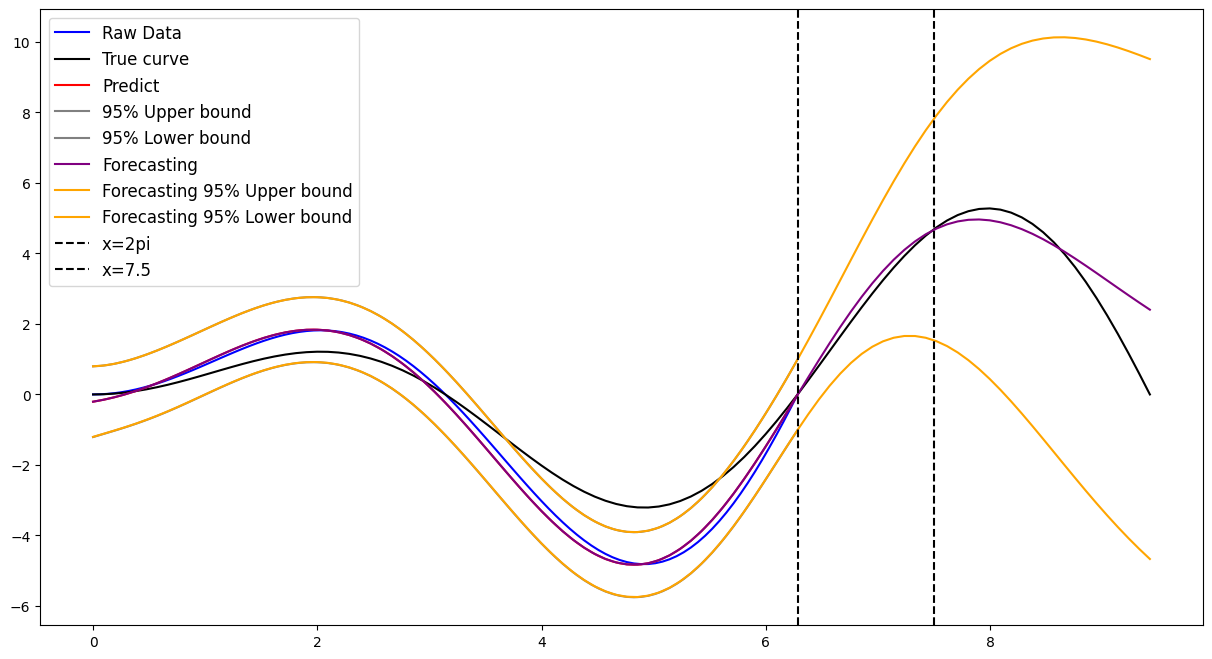

In [ ]:
plt.figure(figsize=(15,8))

plt.plot(x,y, label="Raw Data", color="blue")
plt.plot(x_new,y3, label="True curve", color="black")
plt.plot(x, mean_prediction, label="Predict", color="red")
plt.plot(x, mean_prediction + 1.96 * std_prediction, label="95% Upper bound", color="gray")
plt.plot(x, mean_prediction - 1.96 * std_prediction, label="95% Lower bound", color="gray")
plt.plot(x_new, forecast_mean, label="Forecasting", color="purple")
plt.plot(x_new, forecast_mean + 1.96 * forecast_std, label="Forecasting 95% Upper bound", color="orange")
plt.plot(x_new, forecast_mean - 1.95 * forecast_std, label="Forecasting 95% Lower bound", color="orange")

plt.axvline(x = 2*np.pi, color = 'black', linestyle="--", label="x=2pi")
plt.axvline(x = 7.5, color = 'black', linestyle="--", label="x=7.5")

plt.legend(fontsize=12)
plt.show()

# Plot of upper-right quarter arc

In [ ]:
import plotly.graph_objects as go
import numpy as np


layout = go.Layout(width = 800, height =800,
                    legend=dict(
              orientation="h"))

u = np.linspace(0, np.pi, 100)
v = np.linspace(0, 2 * np.pi, 100)

x = np.outer(np.sin(u), np.cos(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.cos(u), np.ones_like(v))

# Create a 3D surface plot
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)], layout=layout)

u2 = np.linspace(0, np.pi/2, 1000)
v2 = np.zeros_like(u2)

X = np.sin(u2) * np.cos(v2)
Y = np.sin(v2) * np.sin(v2)
Z = np.cos(u2)

print(Y)

fig.add_trace(go.Scatter3d(
    x=X,
    y=Y,
    z=Z,
    mode='markers+lines',
    marker=dict(size=2),
    line=dict(color="blue", width=4)))

fig.update_coloraxes(showscale=False)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.